In [173]:
import json
import glob
import os
import pdb



# data/analysis/icd10/icd10_counts.json
with open('data/analysis/icd10/icd10_counts.json', 'r') as f:
    icd10_counts = json.load(f)

    

FileNotFoundError: [Errno 2] No such file or directory: 'data/analysis/icd10/icd10_counts.json'

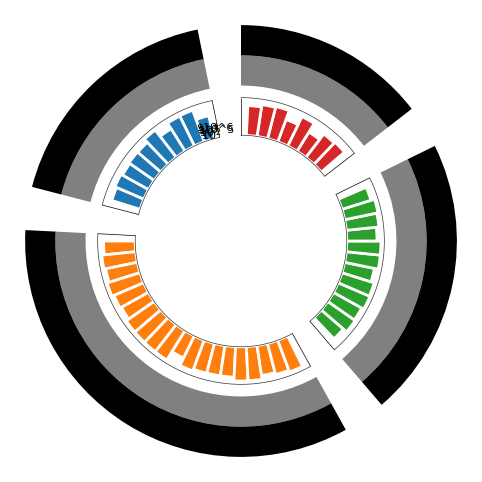

In [279]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np
import pandas as pd

# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)

# Build a dataset|
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=1e3, high=1e5, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

# Show 3 first rows
df.head(3)

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = max(values) + 100
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)
        
        # And finally add the text
        ax.text(
            x=angle, 
            y=padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 
    

VALUES = df["value"].values
LABELS = df["name"].values

VALUES = np.log(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-35, 30 + max(VALUES))
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

# add yticks, $10^2$, $10^3$, $10^4$, $10^5$
ax.set_yticks(min(VALUES) + [0, 1, 2, 3, 4])
ax.set_yticklabels(['$10^2$', '$10^3$', '$10^4$', '$10^5', '$10^6'])
# size
ax.tick_params(axis='y', labelsize=8)

LINE_MIN = -0
offset = 0 

for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    
    angle_start = ANGLES[offset + PAD] - WIDTH
    angle_end = ANGLES[offset + size + PAD - 1] + WIDTH

    x1 = np.linspace(angle_start, angle_end, num=50)
    ax.plot(x1, [LINE_MIN] * 50, color="#333333", lw=0.5)
    ax.plot(x1, [max(VALUES) + 1] * 50, color="#333333", lw=0.5)
    
    # ax.vlines(x1, 0, 3000, color='gray', linewidth=0.5)
    
    # plot the vlines only at the start and end of each group
    ax.vlines(x1[0], LINE_MIN, max(VALUES) + 1, color='black', linewidth=0.5)
    ax.vlines(x1[-1], LINE_MIN, max(VALUES) + 1, color='black', linewidth=0.5)

    

    # plot wedge at the start and end of each group
    # ax.add_patch(wedge)
    ax.add_patch(Rectangle(
        (angle_start, max(VALUES) + 5), angle_end - angle_start, 10, color='gray', lw=0
    ))
    
    ax.add_patch(Rectangle(
        (angle_start, max(VALUES) + 15), angle_end - angle_start, 10, color='black', lw=0
    ))
    
    # # add text for yticks, 10^2, 10^3, 10^4, 10^5, at the end angle of each group
    # ax.text(
    #     angle_start - WIDTH, max(VALUES), '$10^5$', color='black', fontsize=5, ha='center', va='center'
    # )

    # ax.text(
    #     angle_end + WIDTH, min(VALUES), '$10^2$', color='black', fontsize=5, ha='center', va='center'
    # )
    

    # # Add text to indicate group
    # ax.text(
    #     np.mean(x1), -20, group, color="#333333", fontsize=14, 
    #     fontweight="bold", ha="center", va="center"
    # )
    
    # # Add reference lines at 20, 40, 60, and 80
    # x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    # ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    # ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    # ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    # ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

In [280]:
max(VALUES)

11.438341995170033

In [281]:
min(VALUES)

7.468513271496337